                             Assignment No 9 - Association Rules (Dataset - my_movies.csv)
Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Gujar\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Gujar\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [6]:
movie = pd.read_csv("my_movies.csv")
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [7]:
movie.shape

(10, 15)

In [8]:
movie.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [10]:
# Get list of categorical variables
s = (movie.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['V1', 'V2', 'V3', 'V4', 'V5']


In [12]:
num_movie = movie.iloc[:,5:15]
num_movie

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


                             Apriori Algorithm

In [16]:
frequent_itemsets_ap = apriori(num_movie, min_support=0.15, use_colnames=True,verbose=1)
frequent_itemsets_ap

Processing 27 combinations | Sampling itemset size 3


C:\Users\Gujar\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [17]:
frequent_itemsets_ap.shape

(13, 2)

In [19]:
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.1)
rules_ap

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


In [37]:
rules_ap.shape

(16, 13)

In [20]:
rules_ap[(rules_ap.support > 0.015) & (rules_ap.confidence > 0.4)].sort_values("confidence", ascending = False).shape


(15, 10)

In [21]:
rules_ap['lhs items'] = rules_ap['antecedents'].apply(lambda x:len(x) )
rules_ap[rules_ap['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
11,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.50,2
12,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.50,2
10,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

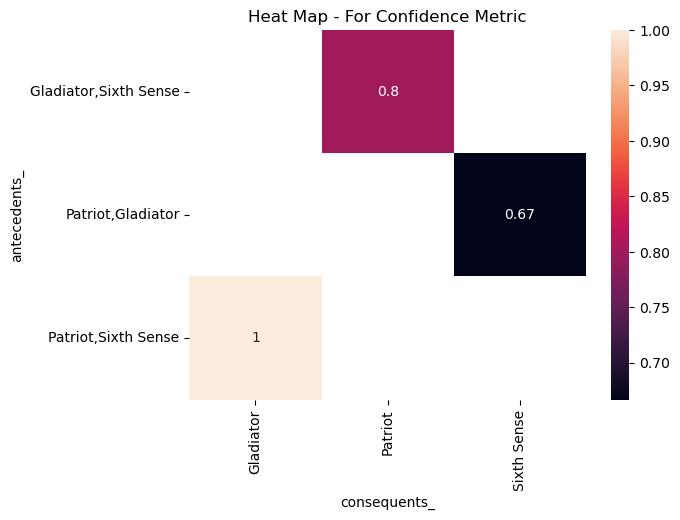

In [22]:
rules_ap['antecedents_'] = rules_ap['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap['consequents_'] = rules_ap['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules_ap[rules_ap['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='support', ylabel='confidence'>

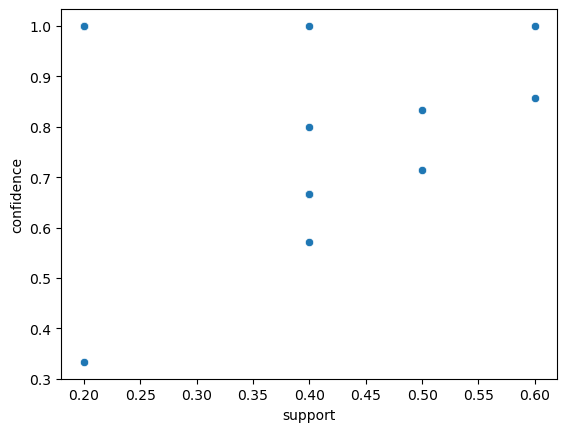

In [42]:
sns.scatterplot( x = rules_ap['support'], y = rules_ap['confidence'])

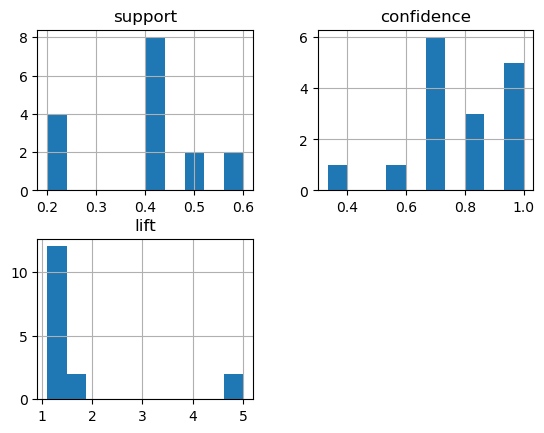

In [49]:
rules_ap[['support', 'confidence', 'lift']].hist()
plt.show()

In [23]:
rules_ap_li = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=0.8)
print(rules_ap_li.shape)

(16, 10)


In [24]:
rules_ap_li['lhs items'] = rules_ap_li['antecedents'].apply(lambda x:len(x) )
rules_ap_li[rules_ap_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
11,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.50,2
12,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.50,2
10,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

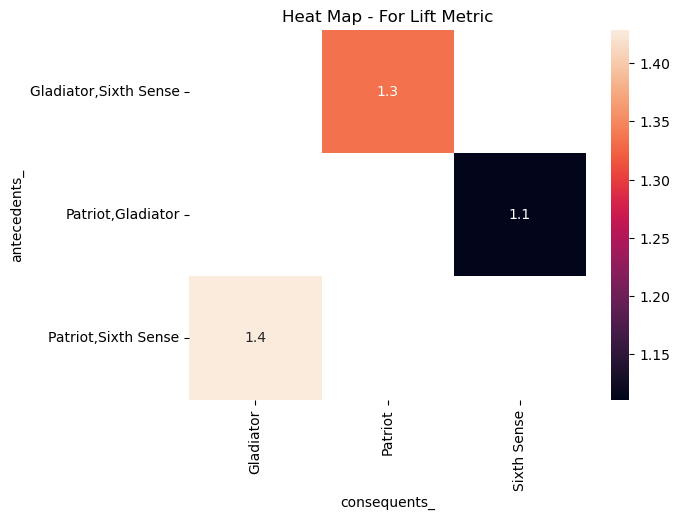

In [25]:
# Replace frozen sets with strings
rules_ap_li['antecedents_'] = rules_ap_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap_li['consequents_'] = rules_ap_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_ap_li[rules_ap_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='support', ylabel='confidence'>

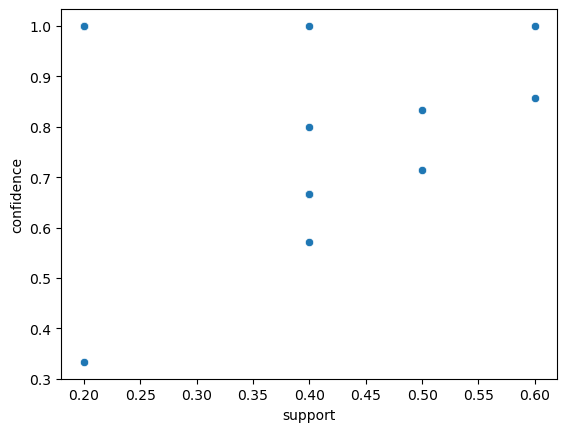

In [43]:
sns.scatterplot( x = rules_ap_li['support'], y = rules_ap_li['confidence'])

                           FpGrowth Algorithm

In [26]:
frequent_itemsets_fp=fpgrowth(num_movie, min_support=0.1, use_colnames=True,verbose=1)
print(frequent_itemsets_fp.shape)

10 itemset(s) from tree conditioned on items ()
3 itemset(s) from tree conditioned on items (Sixth Sense)
3 itemset(s) from tree conditioned on items (Green Mile)
3 itemset(s) from tree conditioned on items (LOTR2)
7 itemset(s) from tree conditioned on items (Harry Potter1)
15 itemset(s) from tree conditioned on items (LOTR1)
0 itemset(s) from tree conditioned on items (Gladiator)
1 itemset(s) from tree conditioned on items (Patriot)
3 itemset(s) from tree conditioned on items (Braveheart)
1 itemset(s) from tree conditioned on items (Harry Potter2)
7 itemset(s) from tree conditioned on items (LOTR)
(53, 2)


C:\Users\Gujar\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [27]:
frequent_itemsets_fp.sort_values("support", ascending = False).head()

,support,itemsets
5,0.7,(Gladiator)
0,0.6,(Sixth Sense)
41,0.6,"(Patriot, Gladiator)"
6,0.6,(Patriot)
10,0.5,"(Gladiator, Sixth Sense)"


In [28]:
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)
print(rules_fp.head())

                antecedents    consequents  antecedent support  \
0             (Sixth Sense)    (Gladiator)                 0.6   
1    (Patriot, Sixth Sense)    (Gladiator)                 0.4   
2  (Gladiator, Sixth Sense)      (Patriot)                 0.5   
3              (Green Mile)  (Sixth Sense)                 0.2   
4   (Green Mile, Gladiator)  (Sixth Sense)                 0.1   

   consequent support  support  confidence      lift  leverage  conviction  \
0                 0.7      0.5    0.833333  1.190476      0.08         1.8   
1                 0.7      0.4    1.000000  1.428571      0.12         inf   
2                 0.6      0.4    0.800000  1.333333      0.10         2.0   
3                 0.6      0.2    1.000000  1.666667      0.08         inf   
4                 0.6      0.1    1.000000  1.666667      0.04         inf   

   zhangs_metric  
0       0.400000  
1       0.500000  
2       0.500000  
3       0.500000  
4       0.444444  


In [30]:
rules_fp[(rules_fp.support > 0.1) & (rules_fp.confidence > 0.8)].sort_values("confidence", ascending = False).shape


(7, 10)

In [31]:
rules_fp['lhs items'] = rules_fp['antecedents'].apply(lambda x:len(x) )
rules_fp[rules_fp['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
126,"(Sixth Sense, LOTR)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,2
74,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,2
47,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,2
48,"(Harry Potter1, LOTR2)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,2
53,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,2


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(2.5, 0, 'Green Mile'),
  Text(4.5, 0, 'Green Mile,Harry Potter1'),
  Text(6.5, 0, 'Green Mile,LOTR1'),
  Text(8.5, 0, 'Green Mile,LOTR1,LOTR2'),
  Text(10.5, 0, 'Green Mile,LOTR2'),
  Text(12.5, 0, 'Green Mile,Sixth Sense,LOTR2'),
  Text(14.5, 0, 'Harry Potter1,LOTR2'),
  Text(16.5, 0, 'Harry Potter1,Sixth Sense,LOTR2'),
  Text(18.5, 0, 'LOTR1'),
  Text(20.5, 0, 'LOTR1,Harry Potter1,Sixth Sense'),
  Text(22.5, 0, 'LOTR1,Sixth Sense'),
  Text(24.5, 0, 'LOTR2'),
  Text(26.5, 0, 'Sixth Sense'),
  Text(28.5, 0, 'Sixth Sense,LOTR2')])

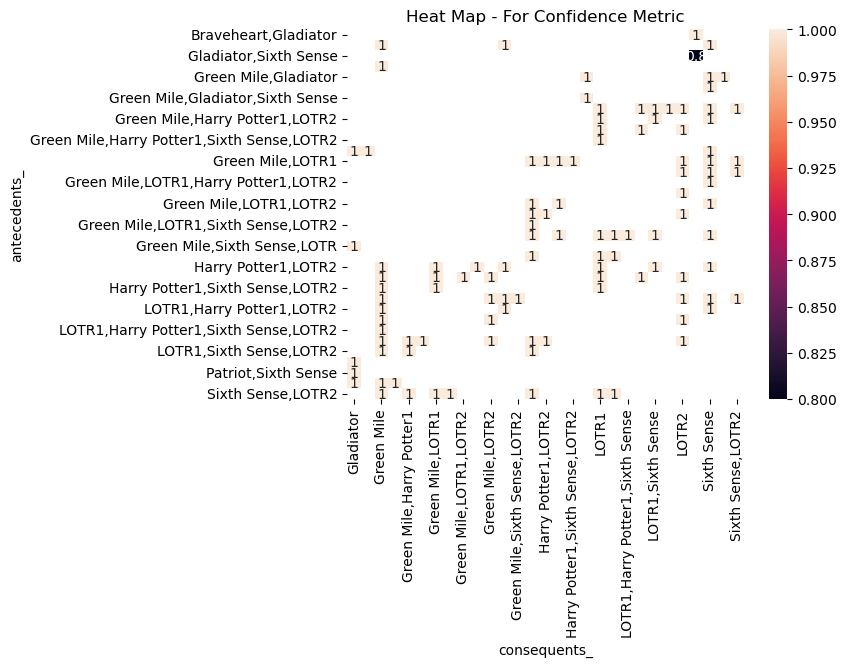

In [32]:
rules_fp['antecedents_'] = rules_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp['consequents_'] = rules_fp['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules_fp[rules_fp['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)


<AxesSubplot:xlabel='support', ylabel='confidence'>

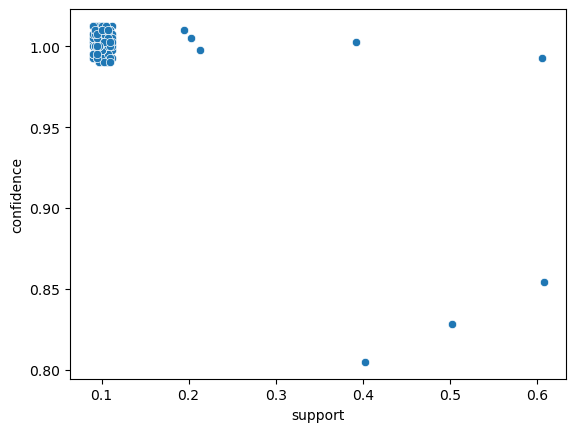

In [48]:
sns.scatterplot( x = rules_fp['support'], y = rules_fp['confidence'])

In [33]:
rules_fp_li = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=0.8)
print(rules_fp_li.shape)

(246, 10)


In [34]:
rules_fp_li['lhs items'] = rules_fp_li['antecedents'].apply(lambda x:len(x) )
rules_fp_li[rules_fp_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
241,"(Sixth Sense, LOTR)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,2
56,"(Green Mile, LOTR2)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,2
169,"(Green Mile, LOTR1, LOTR2)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,3
59,"(Sixth Sense, LOTR2)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,2
126,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,2


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5]),
 [Text(0.5, 0, 'Braveheart'),
  Text(2.5, 0, 'Gladiator,LOTR'),
  Text(4.5, 0, 'Green Mile'),
  Text(6.5, 0, 'Green Mile,Harry Potter1'),
  Text(8.5, 0, 'Green Mile,Harry Potter1,Sixth Sense'),
  Text(10.5, 0, 'Green Mile,LOTR1'),
  Text(12.5, 0, 'Green Mile,LOTR1,LOTR2'),
  Text(14.5, 0, 'Green Mile,LOTR2'),
  Text(16.5, 0, 'Green Mile,Sixth Sense,LOTR2'),
  Text(18.5, 0, 'Harry Potter1,LOTR2'),
  Text(20.5, 0, 'Harry Potter1,Sixth Sense,LOTR2'),
  Text(22.5, 0, 'LOTR1'),
  Text(24.5, 0, 'LOTR1,Harry Potter1,LOTR2'),
  Text(26.5, 0, 'LOTR1,LOTR2'),
  Text(28.5, 0, 'LOTR1,Sixth Sense,LOTR2'),
  Text(30.5, 0, 'Patriot'),
  Text(32.5, 0, 'Sixth Sense,LOTR')])

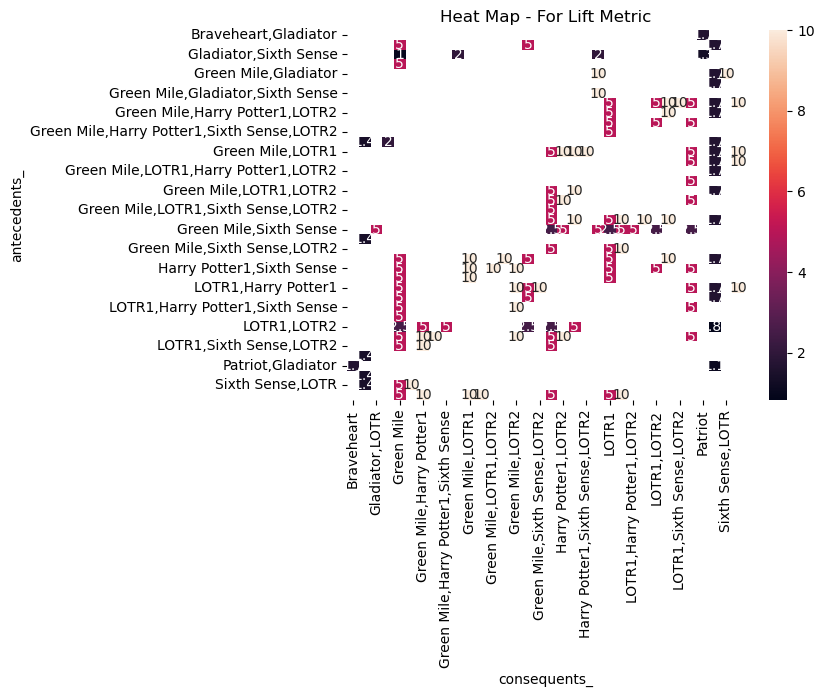

In [35]:
# Replace frozen sets with strings
rules_fp_li['antecedents_'] = rules_fp_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp_li['consequents_'] = rules_fp_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_fp_li[rules_fp_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

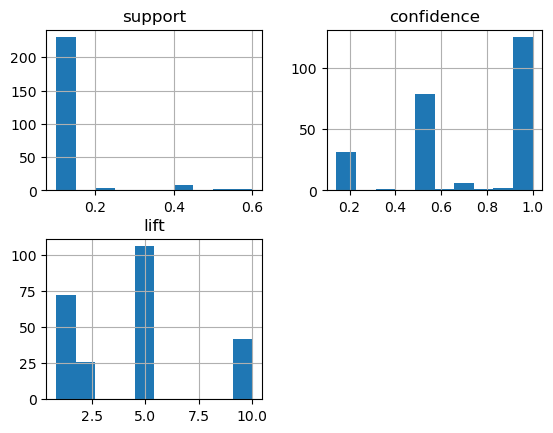

In [36]:
rules_fp_li[['support', 'confidence', 'lift']].hist()
plt.show()